# Housing: Price Prediction

## Data Description

This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.

We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.

1. Load Data and Packages
2. Analyzing the Test Variable (Sale Price)
3. Multivariable Analysis
4. Impute Missing Data and Clean Data
5. Feature Transformation/Engineering
6. Modeling and Predictions

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168,954.00000,1168.000000,1168,77,1168,1168,1168,...,1168.000000,7,237,44,1168.000000,1168.000000,1168.000000,1168,1168,1168.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,928,NaN,NaN,1164,41,740,1046,1168,...,NaN,3,129,40,NaN,NaN,NaN,999,945,NaN
mean,724.136130,56.767979,NaN,70.98847,10484.749144,NaN,NaN,NaN,NaN,NaN,...,3.448630,NaN,NaN,NaN,47.315068,6.344178,2007.804795,NaN,NaN,181477.005993
std,416.159877,41.940650,NaN,24.82875,8957.442311,NaN,NaN,NaN,NaN,NaN,...,44.896939,NaN,NaN,NaN,543.264432,2.686352,1.329738,NaN,NaN,79105.586863
min,1.000000,20.000000,NaN,21.00000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,360.500000,20.000000,NaN,60.00000,7621.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,130375.000000
50%,714.500000,50.000000,NaN,70.00000,9522.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163995.000000
75%,1079.500000,70.000000,NaN,80.00000,11515.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,215000.000000


## EDA

### Checking for null values

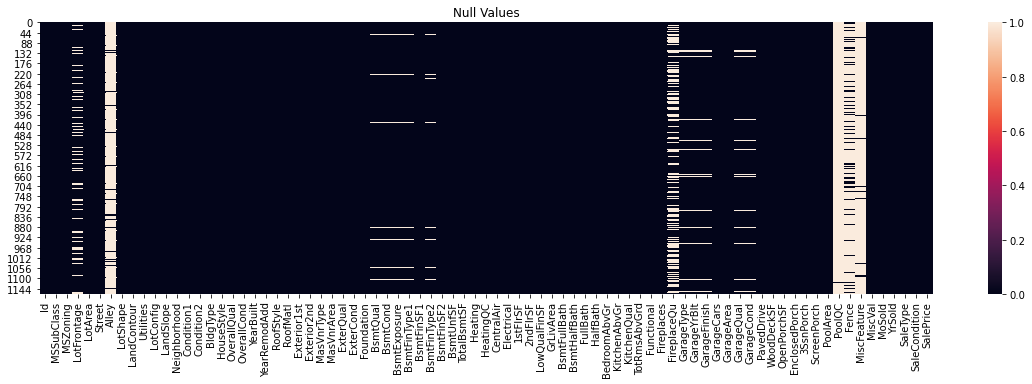

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

As we can see here, the column LotFrontage, Alley, FirepalceQu, PoolQC, Fence, MiscFeature contains more than 75% null values.

### Univariate analysis

#### Analyzing the target variable

In [8]:
# getting description
df['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average price of the house is nearly to 1,81,500.


 mu = 181477.01 and sigma = 79071.72



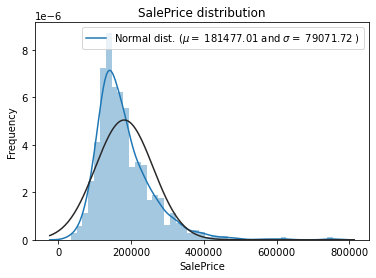

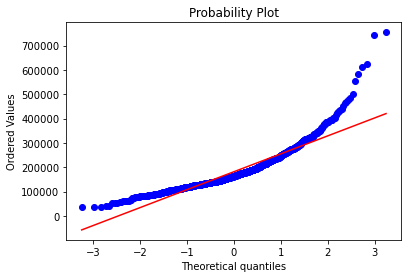

Skewness: 1.953878
Kurtosis: 7.390657


In [9]:
from scipy.stats import norm
from scipy import stats

# Plot Histogram
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

<AxesSubplot:xlabel='SalePrice'>

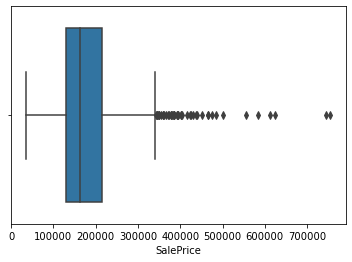

In [10]:
# plotting the boxplot
sns.boxplot(df['SalePrice'])

### Multivariate analysis

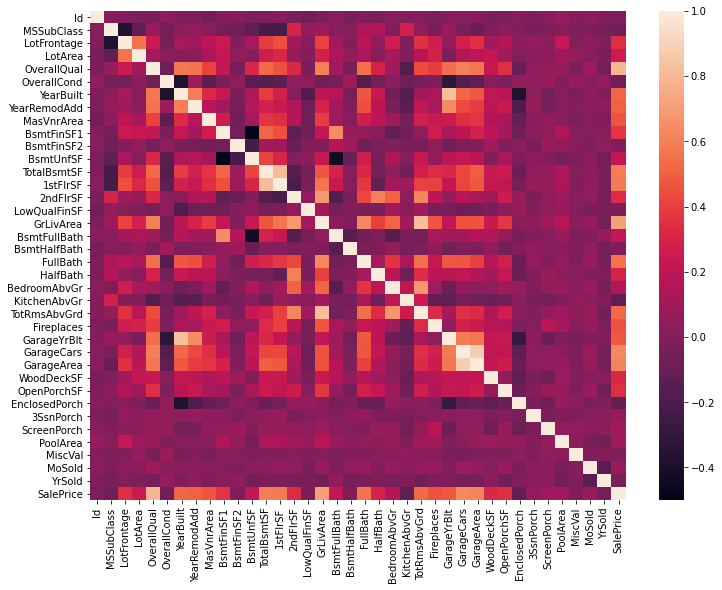

In [11]:
# correlation matrix heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())
plt.show()

From the above heatmap, it's somehow difficult conclude any result. So for the better picture of correlation we use the top 10
variable which is more correlated with the saleprice.

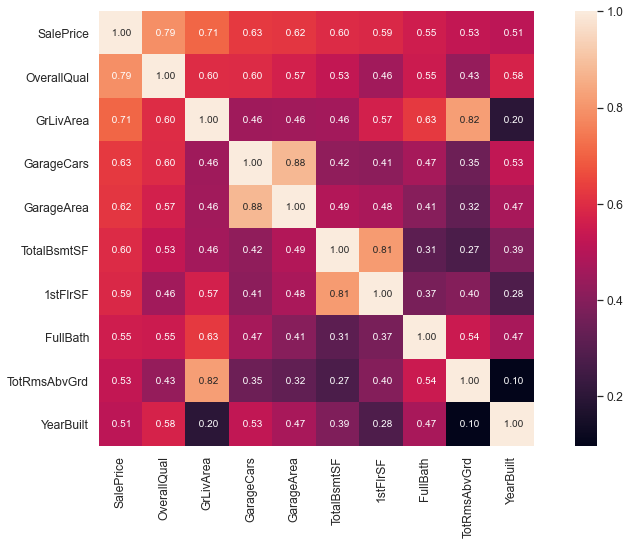

In [12]:
# top 10
plt.figure(figsize=(15,8))
k = 10
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

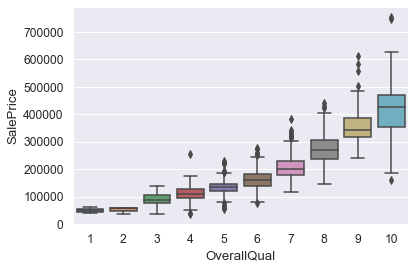

In [13]:
# Overall quality vs saleprice
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

Here we can see people pay more for good quality

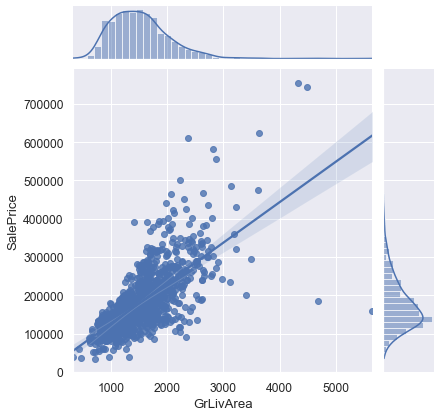

In [14]:
# Living Area vs Sale Price
sns.jointplot(x='GrLivArea', y='SalePrice', data=df, kind='reg')

It makes sense that people would pay for the more living area.
We can see that there are two points on the bottom right which is behaving opposite to our imagination.
So we have to remove it.

In [15]:
# Removing outliers manually (Two points in the bottom right)
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

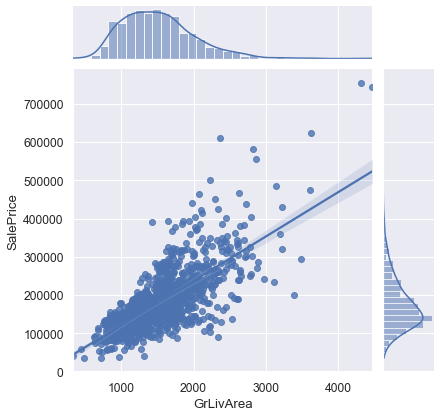

In [16]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df, kind='reg')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

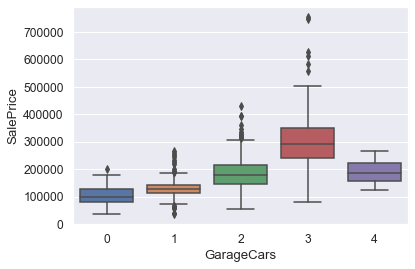

In [17]:
# Garage capacity vs Sale Price
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'], data=df)

There is a increase in price as the garage capacity increases. But 4-car garage capacity has less price, maybe this is due to the person who buys the house doesn't purchase the which has 4-car garage capacity.

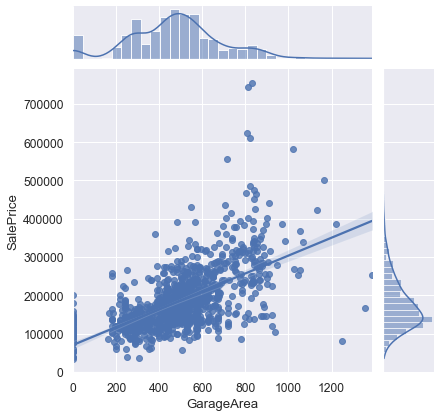

In [18]:
# Garage area vs Sale price
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], data=df, kind='reg')

There are are some outliers present in the bottom right of the plot. And we have to remove that outliers.

In [19]:
# Removing outliers manually(More than 1000sqft, less than $300k)
df = df.drop(df[(df['GarageArea']>1000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

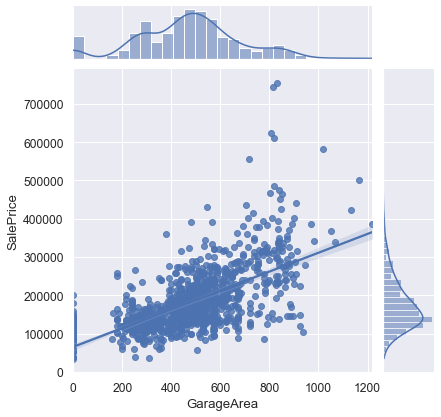

In [20]:
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], data=df, kind='reg')

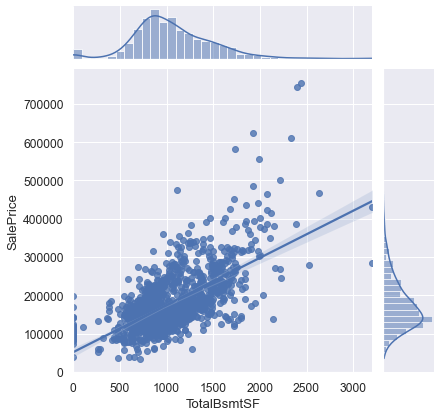

In [21]:
# Basement area vs sale price
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], data=df, kind='reg')

As the basement area increases sale price of a house also increases.

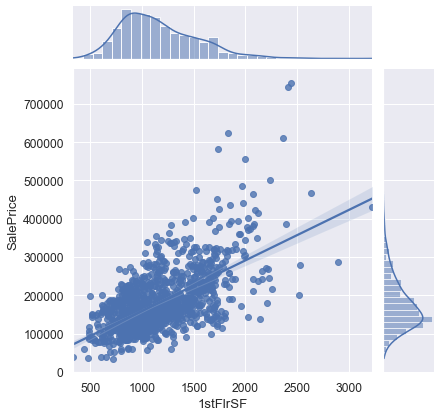

In [22]:
#First floor ares vs Sale Price
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], data=df, kind='reg')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

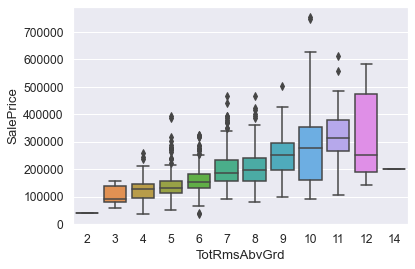

In [23]:
#Total rooms vs Sale price
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'], data=df)

It seems like houses with more than 11 rooms has the same price compared to 10 rooms.

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

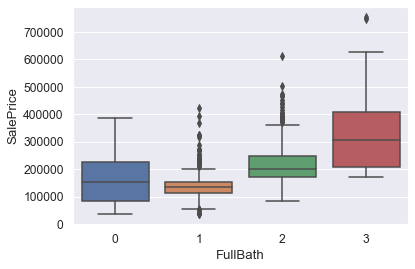

In [24]:
# Full bathrooms vs Sale price
sns.boxplot(x=df['FullBath'], y=df['SalePrice'], data=df)

All seems good.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

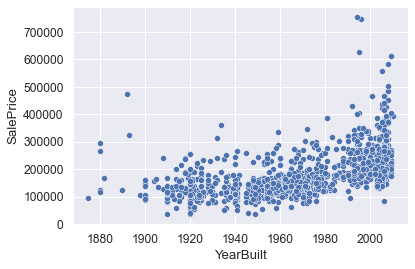

In [25]:
#Year build vs sale price
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], data=df, x_bins=150)

Although it seems like house prices decreases with age, we can't be entirely sure. It is beacause of inflation or some other condition.

## Impute missing data and clean data

In [26]:
# find missing ratio of dataset
df_na = (df.isnull().sum()/len(df))*100
df_na = df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':df_na})
missing_data

,Missing Ratio
PoolQC,99.482759
MiscFeature,96.293103
Alley,93.362069
Fence,79.568966
FireplaceQu,47.413793
LotFrontage,18.362069
GarageYrBlt,5.517241
GarageType,5.517241
GarageFinish,5.517241
GarageQual,5.517241


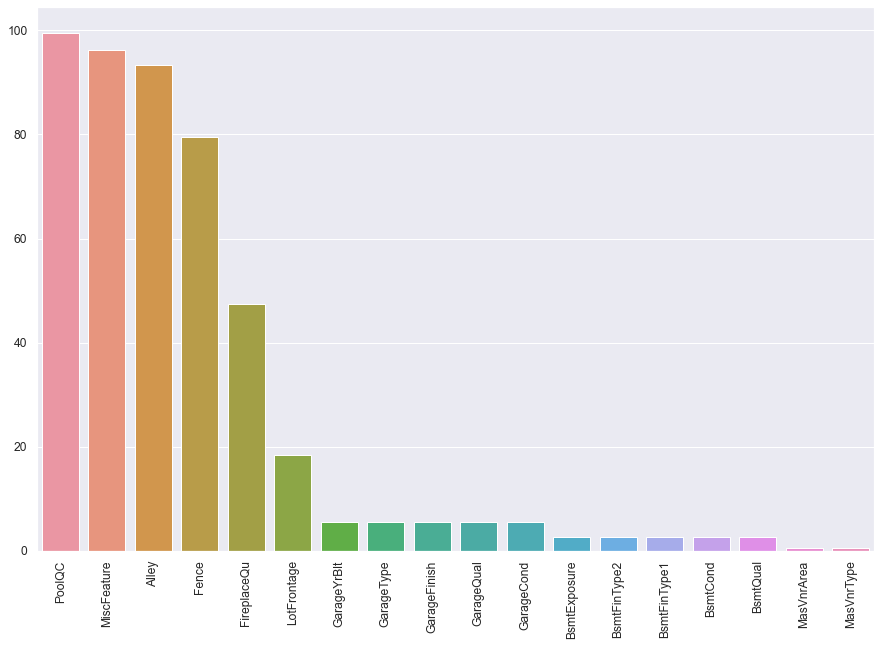

In [27]:
#percent missing data by feature
plt.figure(figsize=(15,10))
sns.barplot(x=df_na.index, y=df_na)
plt.xticks(rotation=90)
plt.show()

## Feature transformation and engineering

### Treating Null Values

In [28]:
# we remove the columns which has null values greater than 40%
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [29]:
# replacing the categorical null values with mode and numerical columns with median
num_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond',
           'BsmtQual', 'MasVnrType']

#replacing numerical columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

#replacing categorical columns    
def fillna(cat_cols):
    cat_cols.fillna(cat_cols.value_counts().index[0], inplace=True)
    return cat_cols
df=df.apply(lambda cat_cols:fillna(cat_cols))

In [30]:
# find missing ratio of dataset
df_na = (df.isnull().sum()/len(df))*100
df_na = df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':df_na})
missing_data

,Missing Ratio


### Fixing skewed feature


 mu = 2.57 and sigma = 0.03



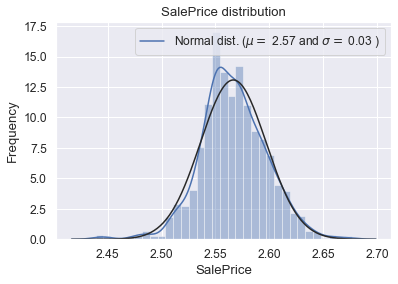

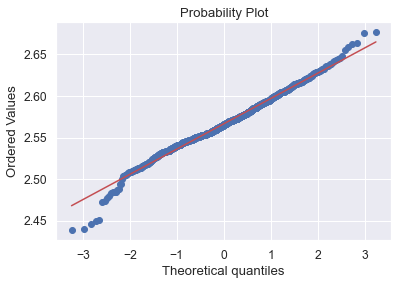

Skewness: -0.058327
Kurtosis: 1.124630


In [152]:
# Here, we fix the target variable to be more normal so that our models will be more accurate when making predictions
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

y_train = df.SalePrice.values

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

### Converting categorical column using LabelEnoder

In [36]:
#importing LabelEncoder to convert categorical columns in to numerical
from sklearn.preprocessing import LabelEncoder

cols = ('MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))

### feature selection

In [37]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

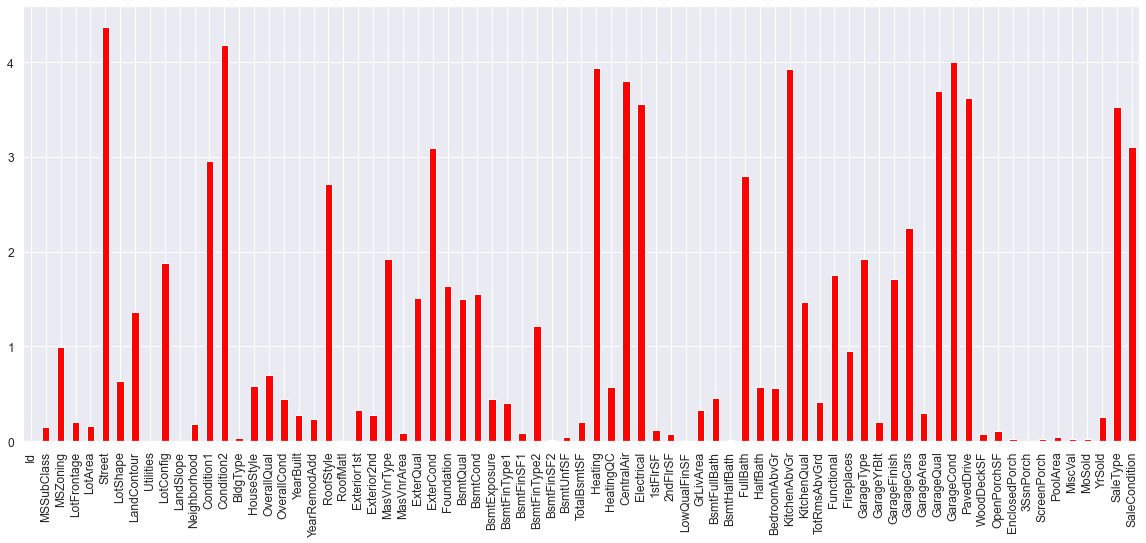

In [49]:
#importing library
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(20,8))
importance = mutual_info_classif(x, y)
#feat_importance = pd.Series(importance, df.columns[0:len(df.columns)-1])
feat_importance.plot(kind='bar', color='red')
plt.show()

In [67]:
# creating a dataframe of the important feature by feature importance
feat_importance_table = pd.DataFrame({'Importance':feat_importance})
pd.set_option('display.max_rows', 80)
feat_importance_table.sort_values(by='Importance', ascending=False)

,Importance
Street,4.373760
Condition2,4.186133
GarageCond,4.008925
Heating,3.945122
KitchenAbvGr,3.925120
CentralAir,3.804380
GarageQual,3.699432
PavedDrive,3.626478
Electrical,3.561676
SaleType,3.527047


In [146]:
# creating a new dataframe with only those features which has importance greater than 1.

df_new = df[['Street', 'Condition2', 'GarageCond', 'Heating', 'KitchenAbvGr', 'CentralAir', 'GarageQual', 'PavedDrive',
             'Electrical', 'SaleType', 'SaleCondition', 'ExterCond', 'Condition1', 'FullBath', 'RoofStyle', 'GarageCars',
             'MasVnrType', 'GarageType' , 'LotConfig', 'Functional', 'GarageFinish', 'Foundation', 'BsmtCond', 'ExterQual',
             'BsmtQual', 'KitchenQual', 'LandContour', 'BsmtFinType2', 'SalePrice']]

## Modelling and Predictions

In [210]:
#importing modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [147]:
X = df_new.drop('SalePrice', axis=1)
Y = df_new['SalePrice']

In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Mean Absolute Error: 0.1724229391252747
Root Mean Squared Error: 0.22665789875709183
Mean Squared Error: 0.051373803068980095
R2: 0.6955195198985691


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

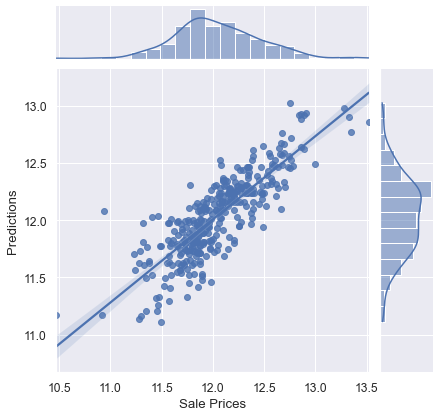

In [199]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('R2: {}'.format(metrics.r2_score(y_test, predlr)))
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=predlr, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

Mean Absolute Error: 0.16738853523225067
Root Mean Squared Error: 0.22406813745089246
Mean Squared Error: 0.05020653022071204
R2: 0.7024376722645289


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

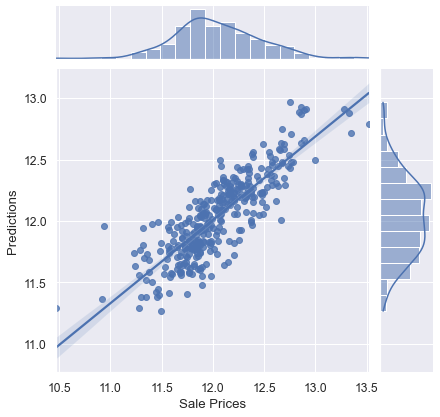

In [207]:
elastic = PoissonRegressor()
elastic.fit(x_train, y_train)
predelastic = elastic.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, predelastic)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predelastic))))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, predelastic)))
print('R2: {}'.format(metrics.r2_score(y_test, predelastic)))
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=predelastic, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

Mean Absolute Error: 0.16946664528160155
Root Mean Squared Error: 0.23072514781609452
Mean Squared Error: 0.05323409383475867
R2: -0.0030284868663812414


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

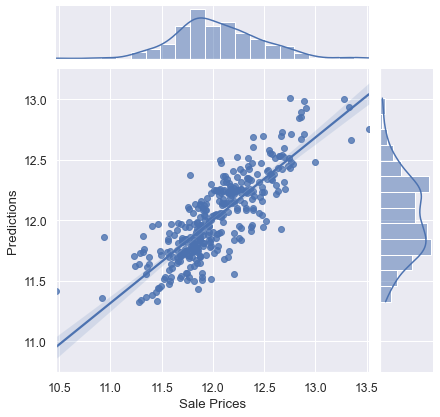

In [211]:
lasso = SVR()
lasso.fit(x_train, y_train)
predlasso = lasso.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, predlasso)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlasso))))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, predlasso)))
print('R2: {}'.format(metrics.r2_score(y_test, predelasso)))
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=predlasso, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

Mean Absolute Error: 0.17218021564308364
Root Mean Squared Error: 0.22610102696849102
Mean Squared Error: 0.05112167439620631
R2: 0.6970138274005934


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

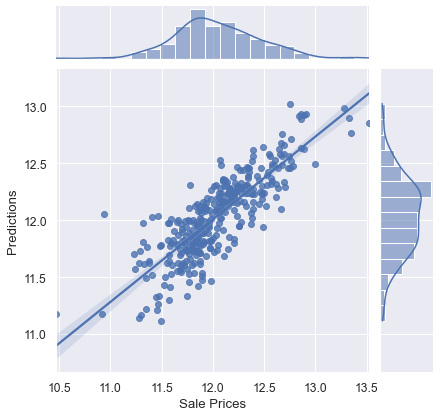

In [196]:
ridge = Ridge()
ridge.fit(x_train, y_train)
predridge = ridge.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, predridge)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predridge))))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, predridge)))
print('R2: {}'.format(metrics.r2_score(y_test, predridge)))
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=predridge, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

Mean Absolute Error: 0.16995114228493785
Root Mean Squared Error: 0.23421805947556462
Mean Squared Error: 0.05485809938449913
R2: 0.674868912943495


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

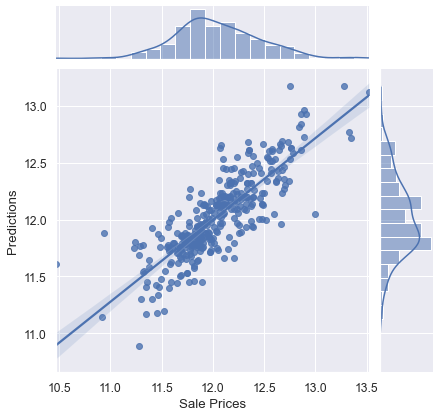

In [195]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, predrfr)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predrfr))))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, predrfr)))
print('R2: {}'.format(metrics.r2_score(y_test, predrfr)))
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=predrfr, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

Mean Absolute Error: 0.1913523539214546
Root Mean Squared Error: 0.24726358715380134
Mean Squared Error: 0.06113928153216552
R2: 0.6376418197232779


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

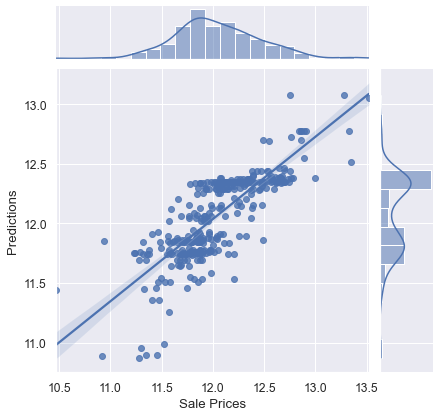

In [194]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
predada = ada.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('R2: {}'.format(metrics.r2_score(y_test, predada)))
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=predada, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

### Checking cross val score

In [175]:
#importing cross val score module
from sklearn.model_selection import cross_val_score
# imporing kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [200]:
# using cross val for Linear Regression model.
lr_cv = cross_val_score(LinearRegression(), X, Y, cv=kfold, scoring='r2')
result = np.absolute(lr_cv.mean())
print("Result: {:.4f}".format(result))

Result: 0.6912


In [209]:
# using cross val for Elastic Net model.
elastic_cv = cross_val_score(PoissonRegressor(), X, Y, cv=kfold, scoring='r2')
result = np.absolute(elastic_cv.mean())
print("Result: {:.4f}".format(result))

Result: 0.6993


In [212]:
# using cross val for Lasso model.
lasso_cv = cross_val_score(SVR(), X, Y, cv=kfold, scoring='r2')
result = np.absolute(lasso_cv.mean())
print("Result: {:.4f}".format(result))

Result: 0.6874


In [203]:
# using cross val for Ridge model.
ridge_cv = cross_val_score(Ridge(), X, Y, cv=kfold, scoring='r2')
result = np.absolute(ridge_cv.mean())
print("Result: {:.4f}".format(result))

Result: 0.7011


In [204]:
# using cross val for RandomForextRegressor model.
rfr_cv = cross_val_score(RandomForestRegressor(), X, Y, cv=kfold, scoring='r2')
result = np.absolute(rfr_cv.mean())
print("Result: {:.4f}".format(result))

Result: 0.6883


In [193]:
# using cross val for AdaBoostRegressor model.
ada_cv = cross_val_score(AdaBoostRegressor(), X, Y, cv=kfold, scoring='r2')
result = np.absolute(ada_cv.mean())
print("Result: {:.4f}".format(result))

Result: 0.6568


* Here our Ridge Regression model performs well.
* So we will do HyperParameter Tuning for Ridge Regression.

### Hyperparameter Tuning

In [213]:
# importing grid search cv
from sklearn.model_selection import GridSearchCV

In [216]:
# creating parameters for the tuning
param_grid = {'fit_intercept':['True', 'False'],
             'normalize':['True', 'False'],
             'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             'alpha':[0.001, 0.01, 0.1, 1.0]}

In [217]:
# passing the created parameters to GridSearchCV
GCV = GridSearchCV(Ridge(), param_grid, cv=kfold)
GCV.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [218]:
GCV.best_params_

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'lsqr'}

In [220]:
# building the model with best parameters
tuned_model = Ridge(alpha=0.1, fit_intercept='True', normalize='True', solver='lsqr')
tuned_model.fit(x_train, y_train)
prediction = tuned_model.predict(x_test)

# printing r2 score for the target variable Sale Price
print("r2 score: {:.4f}".format(metrics.r2_score(y_test, prediction)))

r2 score: 0.7032


Text(23.625, 0.5, 'Predictions')

<Figure size 576x360 with 0 Axes>

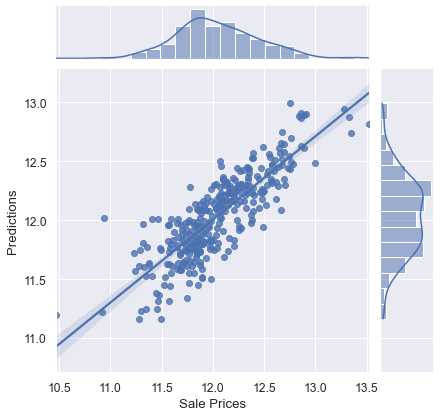

In [221]:
# plotting scatter plot between the predictions and real values
plt.figure(figsize=(8,5))
sns.jointplot(x=y_test, y=prediction, kind='reg')
plt.xlabel('Sale Prices')
plt.ylabel('Predictions')

### Checking how much our predictions are correct

In [223]:
result = pd.DataFrame({'Prediction':prediction, 'Sale Price':y_test})
result

,Prediction,Sale Price
830,12.422015,12.268583
510,12.177693,12.477172
952,11.936124,12.040614
1134,12.349966,12.567241
445,11.928736,11.872354
...,...,...
338,11.980938,11.805603
842,11.621145,11.877576
378,12.322015,12.618186
84,12.166298,11.979805


### Saving our model

In [224]:
# importing joblib
import joblib
joblib.dump(tuned_model, 'Housing.pkl')

['Housing.pkl']

### Loading saved model

In [226]:
save = joblib.load('Housing.pkl')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))
print('r2 score: {}'.format(metrics.r2_score(y_test, prediction)))

Mean Absolute Error: 0.1687419763770977
Mean Squared Error: 0.05007474743052847
Root Mean Squared Error: 0.22377387566587945
r2 score: 0.7032187179498235


In [227]:
prediction

array([12.42201547, 12.17769298, 11.936124  , 12.34996634, 11.92873579,
       11.99746869, 12.33379202, 11.85457826, 12.14209332, 11.24881229,
       12.26288687, 11.55562962, 12.08734086, 12.34646776, 11.79172965,
       12.00937516, 12.28700364, 12.43612922, 11.91400653, 11.63682571,
       11.65673135, 11.77476894, 12.23372235, 11.38173647, 11.76104405,
       11.72909896, 12.22872814, 11.21968179, 11.57044576, 11.72728308,
       11.73856595, 11.82750362, 11.81393486, 12.30687896, 12.37546272,
       12.47654462, 12.0899548 , 11.80732989, 11.97468339, 12.28264959,
       11.95019832, 12.06278461, 11.73612994, 11.73940676, 12.25643803,
       11.79739832, 12.08414434, 12.3463557 , 12.3627346 , 11.64383784,
       12.02030596, 12.08329612, 11.76776768, 12.24193557, 11.74699078,
       12.02061113, 11.70291315, 12.1058776 , 12.16548768, 12.56363786,
       12.49523943, 11.97089414, 12.23372235, 11.93389754, 12.29818749,
       12.19376737, 12.33955331, 12.00997365, 11.83263848, 11.58